In [1]:
from piper.defaults import *

piper v0.1.0: Monday, 29 March 2021 19:08:56


In [2]:
import seaborn as sns
df = sns.load_dataset('titanic')
head(df)

891 rows, 15 columns


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [3]:
combine_header_rows(info(df).T)

Dataframe consumes 0.31 Mb


,Survived Int64,Pclass Int64,Sex Object,Age Float64,Sibsp Int64,Parch Int64,Fare Float64,Embarked Object,Class Category,Who Object,Adult Male Bool,Deck Category,Embark Town Object,Alive Object,Alone Bool
n,891,891,891,891,891,891,891,891,891,891,891,891,891,891,891
isna,0,0,0,177,0,0,0,2,0,0,0,688,2,0,0
isnull,0,0,0,177,0,0,0,2,0,0,0,688,2,0,0
unique,2,3,2,88,7,7,248,3,3,3,2,7,3,2,2


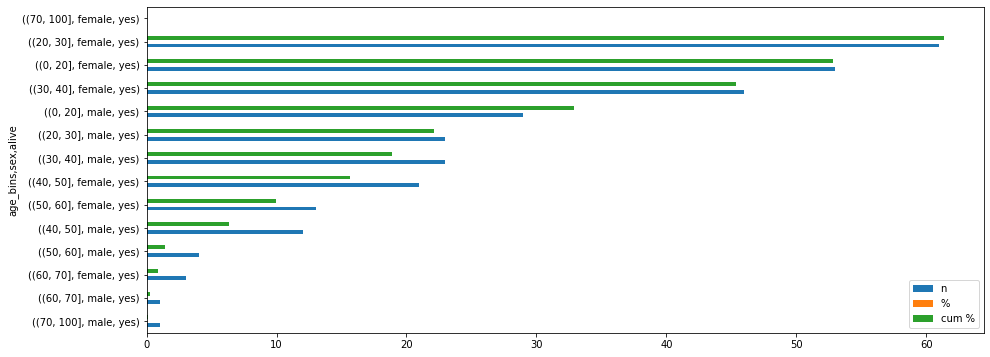

In [4]:
df['age_bins'] = pd.cut(df.age, bins=[0, 20, 30, 40, 50, 60, 70, 100])

fig, ax = plt.subplots(figsize=(15, 6))
(count(df, ['age_bins', 'sex', 'alive'], sort_values=True, percent=True, round=5)
 .query("alive == 'yes'")
 .plot(ax=ax, kind='barh')
);

In [5]:
adorn(count(df, 'age', percent=True, round=5), ignore_index=True)

,n,%,cum %
0,177.0,19.86532,19.86532
1,30.0,3.36700,23.23232
2,27.0,3.03030,26.26263
3,26.0,2.91807,29.18070
4,25.0,2.80584,31.98653
...,...,...,...
85,1.0,0.11223,99.66330
86,1.0,0.11223,99.77553
87,1.0,0.11223,99.88777
88,1.0,0.11223,100.00000


In [6]:
adorn(count(df, 'pclass', percent=True, round=5), ignore_index=True)

,n,%,cum %
0,491,55.10662,55.10662
1,216,24.24242,79.34905
2,184,20.65095,100.00000
3,891,99.99999,234.45567


In [7]:
adorn(count(df, 'class', percent=True, round=5), ignore_index=True)

,n,%,cum %
0,491,55.10662,55.10662
1,216,24.24242,79.34905
2,184,20.65095,100.00000
3,891,99.99999,234.45567


In [8]:
adorn(count(df, 'who', percent=True, round=5), ignore_index=True)

,n,%,cum %
0,537,60.26936,60.26936
1,271,30.41526,90.68462
2,83,9.31538,100.00000
3,891,100.00000,250.95398


In [9]:
adorn(count(df, 'sex', percent=True, round=5), ignore_index=True)

,n,%,cum %
0,577,64.7587,64.7587
1,314,35.2413,100.0000
2,891,100.0000,164.7587
